<a href="https://colab.research.google.com/github/leoforner/Calc_diluicao_automatico/blob/main/IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# base


In [ ]:
# @title Galeria
'''
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data



matplotlib.rcParams['font.size'] = 18

images = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)
'''
#plt.show()

In [ ]:
#@title conectar ao drive


#conexão com drive
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
# @title carrega imagem
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Read the image from the specified path
#image_path = '/content/drive/My Drive/Colab Notebooks/IC/imagens/teste.tif'
image_path = '/content/teste3.tif'
image = ski.io.imread(image_path)

# Read an image using OpenCV
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

copia = np.copy(image)

dd_image = np.copy(image)


if dd_image.ndim > 2:
    dd_image = dd_image.mean(axis=2)

pb_image = np.copy(dd_image)



# Plot the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(pb_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# **SCIKIT**

## Tratamento

In [ ]:
# @title separação de cores de imagem
#https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = image

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

In [ ]:
# @title Chan-Vese Segmentation
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_chan_vese.html#sphx-glr-auto-examples-segmentation-plot-chan-vese-py


import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

image_seg = np.copy(dd_image)
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(
    image_seg,
    mu=0.25,
    lambda1=1,
    lambda2=1,
    tol=1e-3,
    max_num_iter=200,
    dt=0.5,
    init_level_set="checkerboard",
    extended_output=True,
)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image_seg, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image_seg", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()



In [ ]:
#@title tratamento mascara preto e branco



mask = pb_image < 225
mask2 = pb_image > 30

pb_image[mask] = 0
pb_image[mask2] = 255



# Plot the image using matplotlib
plt.imshow(pb_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()



In [ ]:
#@title tratamento progressivo 10 preto e branco

pb_image = [0,0,0,0,0,0,0,0,0,0]

for i in range(10):
    pb_image[i] = np.copy(image)


    if pb_image[i].ndim > 2:
        pb_image[i] = pb_image[i].mean(axis=2)


    mask = pb_image[i] < 25*i
    mask2 = pb_image[i] > 250- 25*i

    pb_image[i][mask] = 0
    pb_image[i][mask2] = 255



    # Plot the image using matplotlib
    plt.imshow(pb_image[i], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()



In [ ]:
# @title Removing small objects in grayscale images with a top hat filter (inutil)
#https://scikit-image.org/docs/stable/auto_examples/filters/plot_tophat.html#sphx-glr-auto-examples-filters-plot-tophat-py
#


import matplotlib.pyplot as plt

from skimage import data
from skimage import color, morphology


footprint = morphology.disk(1)
res = morphology.white_tophat(dd_image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(dd_image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(dd_image - res, cmap='gray')

plt.show()




## Linhas e contornos

In [ ]:
# @title desenho de contornos
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html#sphx-glr-auto-examples-edges-plot-contours-py


import numpy as np
from skimage import measure

pb_image = np.copy(dd_image)

# Find contours at a constant value of 0.8
contours = measure.find_contours(pb_image, 250)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(pb_image, cmap=plt.cm.gray)

'''
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
'''


'''
# Classificar os contornos com base na área
contours_sorted = sorted(contours, key=lambda x: len(x), reverse=True)

# Selecionar os 5 maiores contornos
top_5_contours = contours_sorted[:5]

# Exibir os 5 maiores contornos
for contour in top_5_contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

'''

# Classificar os contornos com base na área
contours_sorted = sorted(contours, key=lambda x: len(x), reverse=True)

# Selecionar apenas o maior contorno
maior_contorno = contours_sorted[0]

# Exibir o maior contorno
ax.plot(maior_contorno[:, 1], maior_contorno[:, 0], linewidth=2)




ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
#@title teste juntando os codigos



pb_image = [0,0,0,0,0,0,0,0,0,0]

for i in range(10):
    pb_image[i] = np.copy(image)


    if pb_image[i].ndim > 2:
        pb_image[i] = pb_image[i].mean(axis=2)


    mask = pb_image[i] < 25*i
    mask2 = pb_image[i] > 250- 25*i

    pb_image[i][mask] = 0
    pb_image[i][mask2] = 255





    # Find contours at a constant value of 0.8
    contours = measure.find_contours(pb_image[i], 250)

    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(pb_image[i], cmap=plt.cm.gray)


    # Classificar os contornos com base na área
    contours_sorted = sorted(contours, key=lambda x: len(x), reverse=True)

    # Selecionar os 5 maiores contornos
    top_5_contours = contours_sorted[:5]

    # Exibir os 5 maiores contornos
    for contour in top_5_contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)



    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


In [ ]:
# @title desenho de vale
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html#sphx-glr-auto-examples-edges-plot-canny-py
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


image_edges = np.copy(dd_image)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image_edges)
edges2 = feature.canny(image_edges, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image_edges, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()



In [ ]:
# @title detecção de linhas


# 1 linha
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data


image_line = np.copy(pb_image)

# Aplicando a transformada de Hough para encontrar as linhas na imagem
h, theta, d = hough_line(image_line)

# Encontrando os picos na transformada de Hough
peaks = hough_line_peaks(h, theta, d)

# Selecionando o pico mais proeminente
best_peak_idx = np.argmax(peaks[0])
best_angle = peaks[1][best_peak_idx]
best_distance = peaks[2][best_peak_idx]

# Calculando as coordenadas das extremidades da linha
y0 = (best_distance - 0 * np.cos(best_angle)) / np.sin(best_angle)
y1 = (best_distance - image_line.shape[1] * np.cos(best_angle)) / np.sin(best_angle)

# Plotando a image_linem original com a linha identificada
plt.imshow(image_line, cmap=plt.cm.gray)
plt.plot((0, image_line.shape[1]), (y0, y1), '-r')
plt.xlim((0, image_line.shape[1]))
plt.ylim((image_line.shape[0], 0))
plt.title('Linha mais proeminente identificada')
plt.show()


'''
# 5 linhas

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data
'''

# Aplicando a transformada de Hough para encontrar as linhas na imagem
h, theta, d = hough_line(image_line)

# Encontrando os picos na transformada de Hough
peaks = hough_line_peaks(h, theta, d, num_peaks=500)

# Plotando a image_linem original com as 5 linhas identificadas
plt.imshow(image_line, cmap=plt.cm.gray)
for _, angle, dist in zip(*peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image_line.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, image_line.shape[1]), (y0, y1), '-r')
plt.xlim((0, image_line.shape[1]))
plt.ylim((image_line.shape[0], 0))
plt.title('5 melhores linhas identificadas')
plt.show()





In [ ]:
#@title modifcacção detecçao de linhas

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data

# Criando uma cópia da imagem para trabalhar com linhas horizontais
image_hline = np.copy(pb_image)

# Aplicando a transformada de Hough para encontrar as linhas na imagem
h, theta, d = hough_line(image_hline)

# Definindo o intervalo de ângulos próximos da horizontal
theta_threshold = np.deg2rad(5)  # Definindo um limiar de 5 graus

# Encontrando os picos na transformada de Hough com base no intervalo de ângulos
peaks = hough_line_peaks(h, theta, d, num_peaks=500)
filtered_peaks = [[], [], []]  # Listas para armazenar picos filtrados

# Filtrando picos com base no intervalo de ângulos
for peak, angle, dist in zip(*peaks):
    if np.abs(angle - np.pi/2) < theta_threshold or np.abs(angle - np.pi) < theta_threshold:
        filtered_peaks[0].append(peak)
        filtered_peaks[1].append(angle)
        filtered_peaks[2].append(dist)

# Plotando a imagem original com as linhas identificadas
#plt.imshow(dd_image, cmap=plt.cm.gray)
for peak, angle, dist in zip(*filtered_peaks):
    plt.imshow(dd_image, cmap=plt.cm.gray)
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image_hline.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, image_hline.shape[1]), (y0, y1), '-r')
    plt.xlim((0, image_hline.shape[1]))
    plt.ylim((image_hline.shape[0], 0))
    plt.title('Linhas identificadas próximas da horizontal')
    plt.show()


In [ ]:
# @title poligonos
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py

import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon


hand = dd_image

print(hand)


# subdivide polygon using 2nd degree B-Splines
new_hand = hand.copy().T
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon(new_hand, tolerance=0.02)

print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.plot(hand[:, 0], hand[:, 1])
ax1.plot(new_hand[:, 0], new_hand[:, 1])
ax1.plot(appr_hand[:, 0], appr_hand[:, 1])



In [ ]:
# @title transformada de linha de hough
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html#sphx-glr-auto-examples-edges-plot-line-hough-transform-py

import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm



# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [
    np.rad2deg(theta[0] - angle_step),
    np.rad2deg(theta[-1] + angle_step),
    d[-1] + d_step,
    d[0] - d_step,
]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

plt.tight_layout()
plt.show()

In [ ]:
# @title Hysteresis thresholding (sobel edges pode ser util)
#https://scikit-image.org/docs/stable/auto_examples/filters/plot_hysteresis.html#sphx-glr-auto-examples-filters-plot-hysteresis-py

import matplotlib.pyplot as plt
from skimage import data, filters

fig, ax = plt.subplots(nrows=2, ncols=2)


edges = filters.sobel(image)

low = 1
high = 0.35

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()




In [ ]:
# @title Ridge operators
#https://scikit-image.org/docs/stable/auto_examples/filters/plot_butterworth.html#sphx-glr-auto-examples-filters-plot-butterworth-py

from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt


def original(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image


image = color.rgb2gray(copia)
cmap = plt.cm.gray

plt.rcParams["axes.titlesize"] = "medium"
axes = plt.figure(figsize=(10, 4)).subplots(2, 9)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate(
        [
            (original, None),
            (meijering, [1]),
            (meijering, range(1, 5)),
            (sato, [1]),
            (sato, range(1, 5)),
            (frangi, [1]),
            (frangi, range(1, 5)),
            (hessian, [1]),
            (hessian, range(1, 5)),
        ]
    ):
        result = func(image, black_ridges=black_ridges, sigmas=sigmas)
        axes[i, j].imshow(result, cmap=cmap)
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

## analise da area obtida

In [ ]:
# @title Codigo de medição de area
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html


import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

img = data.coins()
# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 50)
mask = morphology.remove_small_holes(mask, 50)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)




In [ ]:
# @title Measure region properties
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html


import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)


# OpenCV


## **Detecção de linha**

In [ ]:
img = np.copy(copia)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 1
maxLineGap = 100
lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength,maxLineGap)


for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
      cv2.line(img,(x1,y1),(x2,y2),(0,0,255),15)

cv2.imwrite('houghlines5.jpg',img)

cv2_imshow(img)



In [ ]:
# @title teste de contorno

import cv2 as cv


img = cv.imread('/content/teste3.tif', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,177,255,0)
cv2_imshow( thresh )
contours,hierarchy = cv.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv.moments(cnt)
print( M )

epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)


# Draw the contours on the image
cv2.drawContours(img, contours, -1, (0,255,0), 2)

# Display the image with contours
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()


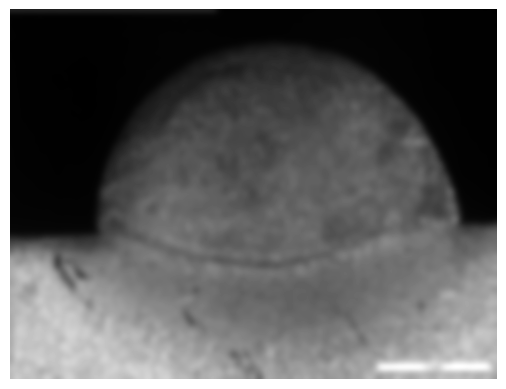

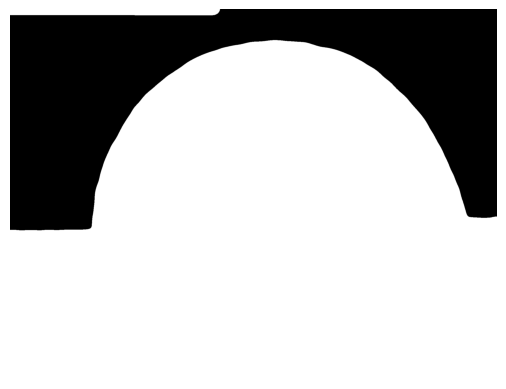

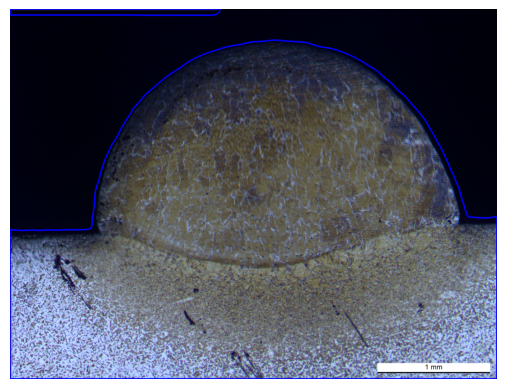

In [ ]:
#@title 2


import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2 as cv



img = Image.open(image_path).convert('RGB')
img = np.array(img)

imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(imgray, (101, 101), 0)

#plt.imshow(blur, cmap = 'gray')

ret,thresh = cv.threshold(blur, 10, 255, 0)

#plt.imshow(  , cmap = 'gray')

cnts, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, cnts, -1, (0,0,255), 5)
#plt.imshow(img, cmap = 'gray')

plt.imshow(blur, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(thresh, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Código final

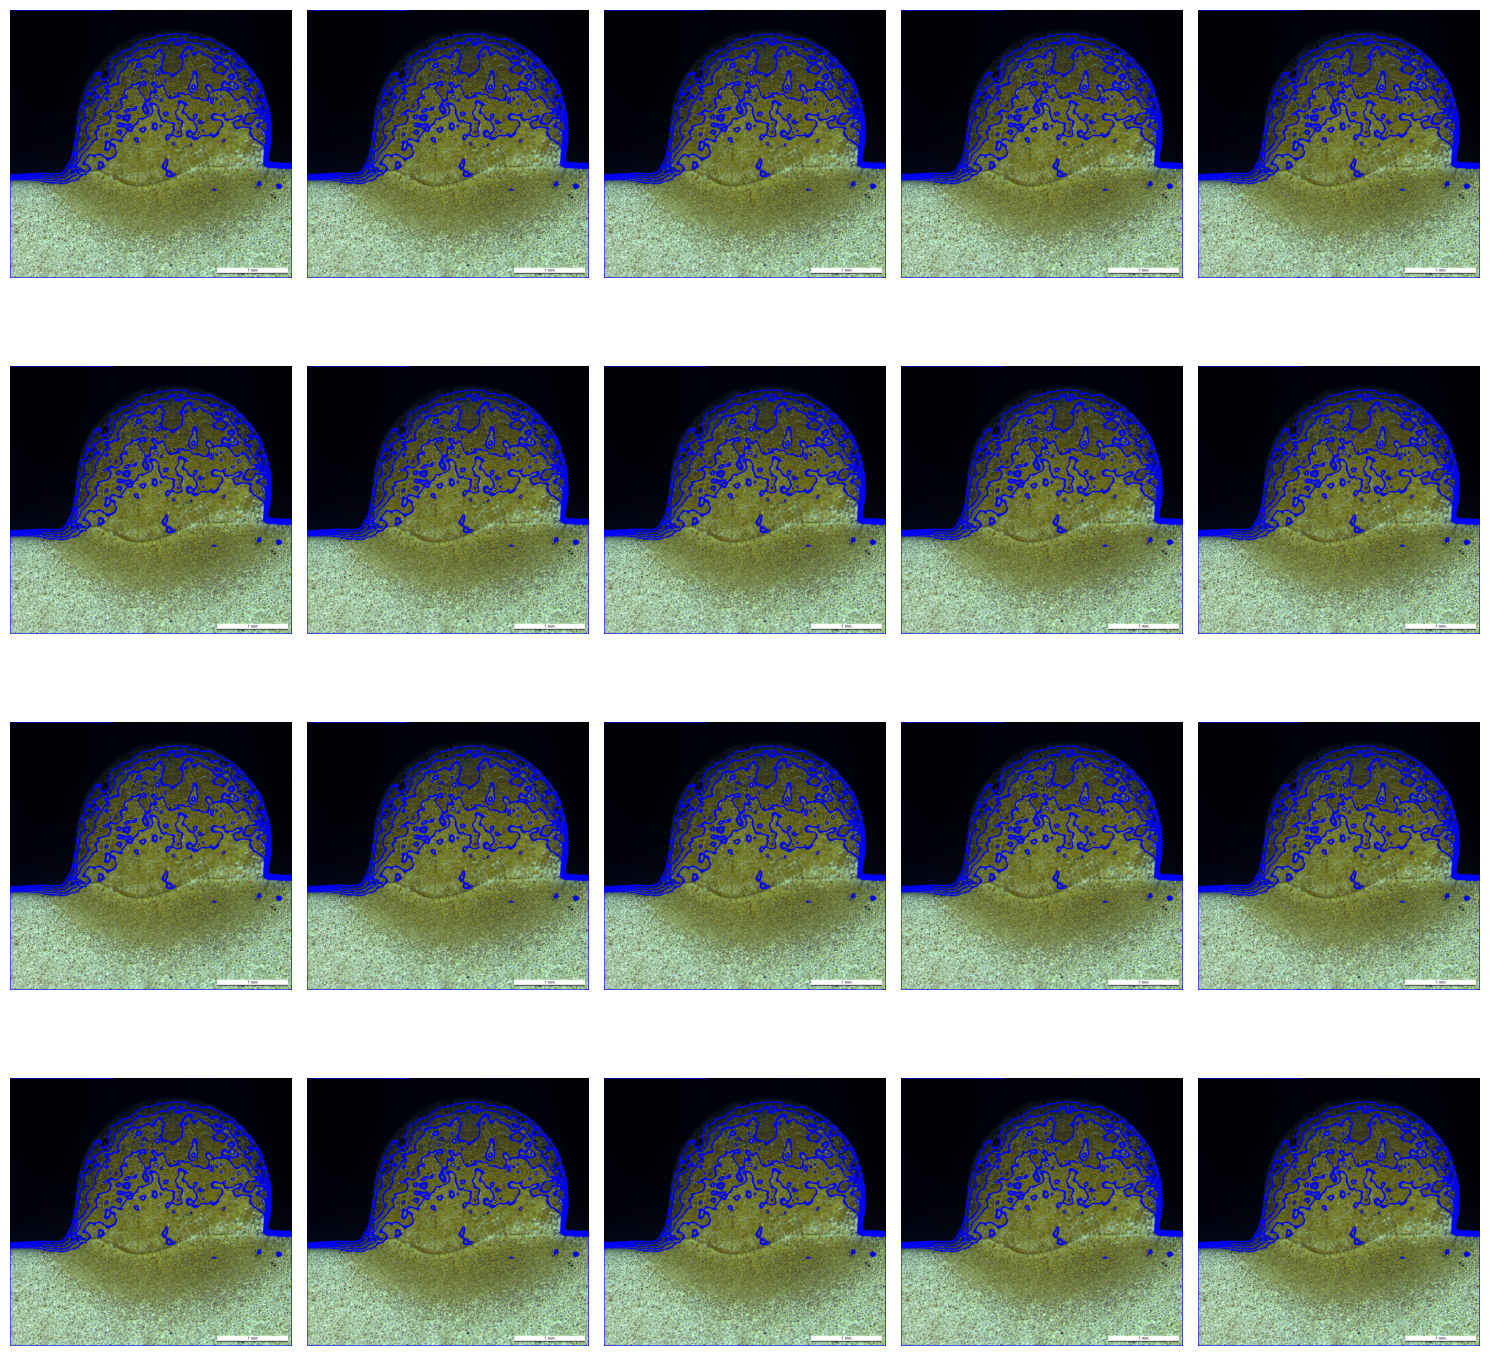

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image


# Read the image from the specified path
image_path = 'C:/Users/leona/OneDrive - UFSC/Imagens/IC/imagens-20240604T172236Z-001/imagens/teste3.tif'
image_path = str(image_path).replace("\\", "/")

# Read an image using OpenCV
image = Image.open(image_path).convert('RGB')
image = np.array(image)

copia = np.copy(image)

pb_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

masc_image = []

for j in range(1,5):

  for i in range(1,6):


    blur = cv.GaussianBlur(pb_image, (61 + j*20, 61 + j*20), 0)

    ret,thresh = cv.threshold(blur,(10 + (15*i)),255,0)

    #masc_image.append(thresh)

    cnts, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(image, cnts, -1, (0,0,255), 5)

    masc_image.append( image)


    '''
    plt.imshow(blur, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    plt.imshow(thresh, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    '''
    



# Criando a figura e os eixos
fig, axs = plt.subplots(4, 5, figsize=(15, 15))

# Plotando as imagens
for i, ax in enumerate(axs.flat):
    ax.imshow(masc_image[i], cmap='gray')  # Altere o cmap conforme necessário
    ax.axis('off')  # Desliga os eixos

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando o plot
plt.show()



In [6]:
import cv2
import numpy as np

# 1. Abrir a imagem
caminho_imagem = 'C:/Users/leona/OneDrive - UFSC/Imagens/robota/Caputinho.png'  # Substitua pelo caminho correto
imagem = cv2.imread(caminho_imagem)

if imagem is None:
    print("Erro ao carregar a imagem. Verifique o caminho.")
    exit()

# 2. Pré-processamento
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_blur = cv2.GaussianBlur(imagem_cinza, (5, 5), 0)  # Blur para reduzir ruído
cv2.imshow("Imagem bp", imagem_cinza)
cv2.imshow("Imagem blur", imagem_blur)

# 3. Thresholding
_, imagem_thresh = cv2.threshold(imagem_blur, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("Imagem threshold", imagem_thresh)

# 4. Detecção de áreas (contornos)
contornos, _ = cv2.findContours(imagem_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.imshow("Imagem Original", imagem)

# Encontrar a maior área
maior_contorno = max(contornos, key=cv2.contourArea)
area_maior = cv2.contourArea(maior_contorno)

print("Área da maior região:", area_maior)

# 5. Desenhar os contornos
imagem_contornos = imagem.copy()
cv2.drawContours(imagem_contornos, contornos, -1, (0, 255, 0), 2)  # Verde, espessura 2


# 6. Detecção de linhas (HoughLinesP)
imagem_linhas = imagem.copy()  # Cópia para desenhar as linhas
linhas = cv2.HoughLinesP(imagem_thresh, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

if linhas is not None:
    # Encontrar as 5 linhas mais próximas da horizontal
    linhas_horizontais = sorted(linhas, key=lambda linha: abs(linha[0][1] - linha[0][3]))[:5]

    for linha in linhas_horizontais:
        x1, y1, x2, y2 = linha[0]
        cv2.line(imagem_linhas, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Desenhar linhas em vermelho

# 7. Mostrar as imagens
cv2.imshow("Imagem Original", imagem)
cv2.imshow("Imagem com Contornos", imagem_contornos)
cv2.imshow("Imagem com Linhas", imagem_linhas)
cv2.waitKey(0)
cv2.destroyAllWindows()


Área da maior região: 1455108.5


In [ ]:
import tkinter as tk

def button_clicked():
    update_text()
    label.config(text="Botão pressionado!")

def update_text():
    entry_text = entry.get()
    text.insert(tk.END, entry_text + "\n")
    entry.delete(0, tk.END)

def percentage_window(window, width_percent, height_percent):

    # Calculando as dimensões da janela em pixels
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    width = (screen_width * width_percent) // 100
    height = (screen_height * height_percent) // 100

    return width, height

root = tk.Tk()
root.title("Exemplo de Tkinter")

# ajustando a janela na tela em porcentagem
width, height = percentage_window(root, 100, 100)
root.geometry(f"{width}x{height}")


frame = tk.Frame(root, width=width, height=height, bg="lightblue")
frame.pack_propagate(False)
frame.pack()

label = tk.Label(frame, text="Exemplo de Tkinter", font=("Arial", 12), bg="lightblue")
label.pack()

button = tk.Button(frame, text="Clique Aqui", command=button_clicked)
button.pack()

entry = tk.Entry(frame)
entry.pack()

text = tk.Text(frame, wrap=tk.WORD)
text.pack()


root.config(bg="lightgrey")

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import os


def percentage_window(window, width_percent, height_percent):

    # Calculando as dimensões da janela em pixels
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    width = (screen_width * width_percent) // 100
    height = (screen_height * height_percent) // 100

    return width, height

class PhotoViewerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Calculo de diluição")

        # ajustando a janela na tela em porcentagem
        width, height = percentage_window(root, 100, 100)
        self.root.geometry(f"{width}x{height}")

        self.photo_folder = ""
        self.images = []

        self.create_widgets()

    def create_widgets(self):
        self.select_button = tk.Button(self.root, text="Selecionar Pasta de Fotos", command=self.select_photo_folder)
        self.select_button.pack(pady=10)

        self.image_frame = tk.Frame(self.root)
        self.image_frame.pack(padx=2, pady=2)

    def select_photo_folder(self):
        self.photo_folder = filedialog.askdirectory()
        if self.photo_folder:
            self.load_images()
            self.display_images()

    def load_images(self):
        self.images = []
        for filename in os.listdir(self.photo_folder):
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".tif"):
                image_path = os.path.join(self.photo_folder, filename)
                image = Image.open(image_path)
                image.thumbnail((150, 150))  # Redimensiona a imagem para 150x150
                photo = ImageTk.PhotoImage(image)
                self.images.append(photo)

    def display_images(self):
        # Limpa o quadro de imagem
        for widget in self.image_frame.winfo_children():
            widget.destroy()

        # Exibe as imagens em uma grade de 4 colunas e linhas
        for i, photo in enumerate(self.images):
            row = i % 4
            col = i // 4
            label = tk.Label(self.image_frame, image=photo)
            label.grid(row=row, column=col, padx=5, pady=5)

if __name__ == "__main__":
    root = tk.Tk()
    app = PhotoViewerApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable